## Import necessary stuff

In [5]:
import trackml
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import math
from trackml.dataset import load_event, load_dataset

In [164]:
hits, cells, particles, truth = load_event('/Users/pjfox/Dropbox/NN/my_TrackML/train_100_events/event000001008')
detector = pd.read_csv('/Users/pjfox/Dropbox/NN/my_TrackML/detectors.csv')

In [6]:
truth.head(5)

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,0,-82.827698,-11.23490,-1502.5,-106392.000000,-83740.703125,-990792.00000,0.000000
1,2,54046768941236224,-62.001099,-9.77214,-1502.5,-0.376546,-0.078014,-9.13697,0.000010
2,3,648523706460536832,-69.645103,-6.66218,-1502.5,0.296218,-0.005539,-4.56560,0.000008
3,4,211689523451527168,-65.926300,-11.65280,-1502.5,-0.694430,-0.096874,-15.61210,0.000009
4,5,90072817181130752,-78.039398,-9.36927,-1502.5,-0.253215,-0.006199,-4.82480,0.000007


In [7]:
cells.head(5)

,hit_id,ch0,ch1,value
0,1,261,950,0.103127
1,1,262,950,0.179765
2,1,261,949,0.005583
3,2,265,579,0.265339
4,3,191,710,0.269449


In [8]:
hits.head(5)

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-82.837997,-11.24020,-1502.5,7,2,1
1,2,-62.021400,-9.77127,-1502.5,7,2,1
2,3,-69.657799,-6.66082,-1502.5,7,2,1
3,4,-65.937302,-11.63420,-1502.5,7,2,1
4,5,-78.020599,-9.37532,-1502.5,7,2,1


In [165]:
detector.head()

,volume_id,layer_id,module_id,cx,cy,cz,rot_xu,rot_xv,rot_xw,rot_yu,...,rot_yw,rot_zu,rot_zv,rot_zw,module_t,module_minhu,module_maxhu,module_hv,pitch_u,pitch_v
0,7,2,1,-65.7965,-5.17830,-1502.5,0.078459,-0.996917,0.0,-0.996917,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
1,7,2,2,-139.8510,-6.46568,-1502.0,0.046183,-0.998933,0.0,-0.998933,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
2,7,2,3,-138.6570,-19.34190,-1498.0,0.138156,-0.990410,0.0,-0.990410,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
3,7,2,4,-64.1764,-15.40740,-1498.0,0.233445,-0.972370,0.0,-0.972370,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
4,7,2,5,-136.2810,-32.05310,-1502.0,0.228951,-0.973438,0.0,-0.973438,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625


## Attempt to understand coordinate systems, to (ultimately)  allow comparison of hit shape to truth momentum...so far not working!!

In [355]:
#hitid=58268
hitvols=[[volid, np.array(hits.loc[hits['volume_id'] ==volid][:1]['hit_id'])[0]] for volid in [7,8,9,12,13,14,16,17,18]]
print hitvols
hitid=hitvols[5][1]
print hitid
#get global position of hit
temparray=np.array(hits.loc[hits['hit_id']==hitid])[0]
globalpos = np.array([temparray[1],temparray[2],temparray[3]])
#get volume, layer, module
vol, layer, mod = temparray[4:7].astype(int)
print vol, layer, mod
#get u,v coordinate
temparrayu = np.array(cells.loc[cells['hit_id']==hitid]['ch0'])
temparrayv = np.array(cells.loc[cells['hit_id']==hitid]['ch1'])
ch0, ch1, w = np.array([temparrayu[0], temparrayv[0], 0])
# get detector info, rot, pitch (size of cells?) and shift
temparray = np.array(detector.loc[(detector['volume_id'] == vol) & (detector['layer_id'] == layer) & (detector['module_id'] == mod)])[0]
rot = np.array([[temparray[6],temparray[7],temparray[8]],
       [temparray[9],temparray[10],temparray[11]],
       [temparray[12],temparray[13],temparray[14]]
      ])
humin, humax, hv = temparray[16], temparray[17], temparray[18]
print np.linalg.det(rot)
shift = np.array([temparray[3],temparray[4],temparray[5]])
pitchu, pitchv = temparray[-2], temparray[-1]
print "pitch: = ", pitchu, pitchv
#local position in mm
vinmm = (ch1 + 0.5) * pitchv - hv
uinmm = (ch0 + 0.5) * pitchu - (humin * (hv + vinmm) + humax * (hv - vinmm))/(2. * hv)
#localposmill = (localpos+[0.5,0.5,0]) * np.array([pitchu, pitchv, 0]) 
localposmill = [uinmm, vinmm, 0.]
print "rot = \n", rot
print "(u,v,0) =", localpos
print "local pos in mm = ", localposmill
print "shift, (cx,cy,cz) =", shift
print "R.u     =", rot.dot(localposmill)
print "R.u + c =", rot.dot(localposmill) + shift
print "(x,y,z)= ", globalpos

[[7, 1], [8, 15765], [9, 42326], [12, 58268], [13, 65473], [14, 89435], [16, 96699], [17, 99295], [18, 109020]]
89435
14 2 1
0.9999996806310399
pitch: =  0.08 1.2
rot = 
[[-0.0581448 -0.998308   0.       ]
 [ 0.998308  -0.0581448  0.       ]
 [ 0.         0.         1.       ]]
(u,v,0) = [261 950   0]
local pos in mm =  [-1.5300000000000011, -65.4, 0.0]
shift, (cx,cy,cz) = [-317.462   -18.4901 1218.5   ]
R.u     = [65.37830474  2.27525868  0.        ]
R.u + c = [-252.08369526  -16.21484132 1218.5       ]
(x,y,z)=  [-252.04699707  -16.84370041 1218.5       ]


In [362]:
def truthmom_to_ch(tpx, tpy, tpz, vol, layer, mod):
    temparray = np.array(detector.loc[(detector['volume_id'] == vol) & (detector['layer_id'] == layer) & (detector['module_id'] == mod)])[0]
    rot = np.transpose(np.array([[temparray[6],temparray[7],temparray[8]],
                    [temparray[9],temparray[10],temparray[11]],
                    [temparray[12],temparray[13],temparray[14]]
                   ]))
    pitchu, pitchv = temparray[-2], temparray[-1]
    humin, humax, hv = temparray[16], temparray[17], temparray[18]
    u, v, w = rot.dot(np.array([tpx,tpy,tpz]))
    ch1 = (v + hv)/pitchv - 0.5
    huv = (humin * (hv + v) + humax * (hv - v))/(2. * hv)
    ch0 = (u + huv)/pitchu -0.5
    return ch0,ch1



(290.5898365, 62.69079133333334)

## Make a larger database that contains info I want

In [14]:
# join hits with truth #
df=hits.merge(truth)
# extract length of each hit entry in cells, i.e. how many cells are read out in each hits
dftemp = pd.DataFrame(np.array(cells['hit_id'].value_counts().sort_index()),columns=['num_cells'])
print(min(dftemp['num_cells']),max(dftemp['num_cells']))
# add the length of cells column to database #
df['num_cells'] = dftemp['num_cells']
# add mean of charge
dftemp=pd.DataFrame(np.array(cells.groupby('hit_id').mean()['value'].sort_index()),columns=['value'])
df['mean_cells'] = dftemp['value']
# add standard deviation of charge
dftemp=pd.DataFrame(np.array(cells.groupby('hit_id').std().fillna(0)['value'].sort_index()),columns=['value'])
df['std_cells'] = dftemp['value']
# add mean of ch0
dftemp=pd.DataFrame(np.array(cells.groupby('hit_id').mean()['ch0'].sort_index()),columns=['ch0'])
df['ch0_mean'] = dftemp['ch0']
# add standard deviation of ch0
dftemp=pd.DataFrame(np.array(cells.groupby('hit_id').std().fillna(0)['ch0'].sort_index()),columns=['ch0'])
df['ch0_std'] = dftemp['ch0']#cells.groupby('hit_id').std().fillna(0)['value']
# add mean of ch1
dftemp=pd.DataFrame(np.array(cells.groupby('hit_id').mean()['ch1'].sort_index()),columns=['ch1'])
df['ch1_mean'] = dftemp['ch1']
# add standard deviation of ch1
dftemp=pd.DataFrame(np.array(cells.groupby('hit_id').std().fillna(0)['ch1'].sort_index()),columns=['ch1'])
df['ch1_std'] = dftemp['ch1']#cells.groupby('hit_id').std().fillna(0)['value']

df.head(5)

(1, 67)


,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,...,tpy,tpz,weight,num_cells,mean_cells,std_cells,ch0_mean,ch0_std,ch1_mean,ch1_std
0,1,-82.837997,-11.24020,-1502.5,7,2,1,0,-82.827698,-11.23490,...,-83740.703125,-990792.00000,0.000000,3,0.096158,0.0873,261.333333,0.57735,949.666667,0.57735
1,2,-62.021400,-9.77127,-1502.5,7,2,1,54046768941236224,-62.001099,-9.77214,...,-0.078014,-9.13697,0.000010,1,0.265339,0.0000,265.000000,0.00000,579.000000,0.00000
2,3,-69.657799,-6.66082,-1502.5,7,2,1,648523706460536832,-69.645103,-6.66218,...,-0.005539,-4.56560,0.000008,1,0.269449,0.0000,191.000000,0.00000,710.000000,0.00000
3,4,-65.937302,-11.63420,-1502.5,7,2,1,211689523451527168,-65.926300,-11.65280,...,-0.096874,-15.61210,0.000009,1,0.295196,0.0000,296.000000,0.00000,651.000000,0.00000
4,5,-78.020599,-9.37532,-1502.5,7,2,1,90072817181130752,-78.039398,-9.36927,...,-0.006199,-4.82480,0.000007,1,0.264840,0.0000,232.000000,0.00000,862.000000,0.00000


In [15]:
# add some extra columns of processed data to cells
# first moments
cells['xm'] = cells['ch0'] * cells['value']
cells['ym'] = cells['ch1'] * cells['value']
# second moments
cells['xsqm'] = cells['ch0'] * cells['ch0'] * cells['value']
cells['ysqm'] = cells['ch1'] * cells['ch1'] * cells['value']
# use this processed information to add extra columns to df
dftemp = cells.groupby('hit_id').sum()
#geometric mean in ch0
dftemp['xgeomean'] = dftemp['xm']/dftemp['value']
#geometric mean in ch1
dftemp['ygeomean'] = dftemp['ym']/dftemp['value']
#second moment
dftemp['mominertia'] = (dftemp['xsqm'] - 2.0 * dftemp['xgeomean'] * dftemp['xm'] + dftemp['xgeomean'] * dftemp['xgeomean'] * dftemp['value']) + (dftemp['ysqm'] - 2.0 * dftemp['ygeomean'] * dftemp['ym'] + dftemp['ygeomean'] * dftemp['ygeomean'] * dftemp['value'])
dftemp= pd.DataFrame(np.array(dftemp['mominertia'].sort_index()),columns=['mominertia'])
df['mominertia'] = dftemp['mominertia']
df.head(5)

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,...,tpz,weight,num_cells,mean_cells,std_cells,ch0_mean,ch0_std,ch1_mean,ch1_std,mominertia
0,1,-82.837997,-11.24020,-1502.5,7,2,1,0,-82.827698,-11.23490,...,-990792.00000,0.000000,3,0.096158,0.0873,261.333333,0.57735,949.666667,0.57735,0.083165
1,2,-62.021400,-9.77127,-1502.5,7,2,1,54046768941236224,-62.001099,-9.77214,...,-9.13697,0.000010,1,0.265339,0.0000,265.000000,0.00000,579.000000,0.00000,0.000000
2,3,-69.657799,-6.66082,-1502.5,7,2,1,648523706460536832,-69.645103,-6.66218,...,-4.56560,0.000008,1,0.269449,0.0000,191.000000,0.00000,710.000000,0.00000,0.000000
3,4,-65.937302,-11.63420,-1502.5,7,2,1,211689523451527168,-65.926300,-11.65280,...,-15.61210,0.000009,1,0.295196,0.0000,296.000000,0.00000,651.000000,0.00000,0.000000
4,5,-78.020599,-9.37532,-1502.5,7,2,1,90072817181130752,-78.039398,-9.36927,...,-4.82480,0.000007,1,0.264840,0.0000,232.000000,0.00000,862.000000,0.00000,0.000000


In [16]:
# seperate hits into bad (truth p_id == 0) and good (the others)
badhits=df.loc[df['particle_id'] == 0]
goodhits=df.loc[df['particle_id'] != 0]
print(len(badhits), len(goodhits))
print(1.0*len(badhits)/(1.0*len(goodhits)))
maxgood=max(goodhits['num_cells'])
maxbad=max(badhits['num_cells'])
print(maxgood,maxbad)

(17496, 94371)
0.185395937311
(67, 62)


In [170]:
# look at a sample of goodhits and bad hits 
#goodhits.loc[goodhits['num_cells'] > 20]
#badhits.loc[goodhits['num_cells'] > 20]
goodhits.loc[goodhits['num_cells'] > 60]

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,num_cells
17666,17667,-4.694390,31.664301,-119.608002,8,2,93,459373278025220096,-4.692510,31.664900,-119.606003,-0.379779,-0.048774,-0.545847,0.000000,65
23112,23113,-8.753200,30.245199,153.380997,8,2,157,648520133064531970,-8.752500,30.245399,153.378998,0.187960,0.011708,-0.397464,0.000014,64
41979,41980,-21.302601,171.985001,359.684998,8,8,997,391818733875646466,-21.293301,171.988007,359.678986,-0.163414,-0.082016,0.127806,0.000013,61
52669,52670,-38.729900,73.215897,958.000000,9,8,90,22523426992295937,-38.729401,73.232002,958.000000,-0.005389,-0.164094,0.019530,0.000036,67


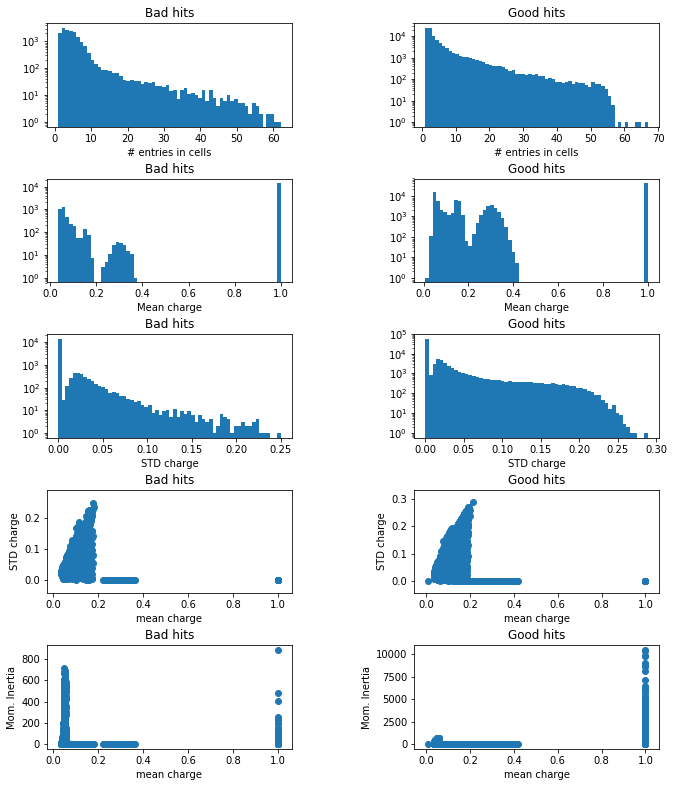

In [79]:
# some plots of good hits and bad hits
nplotsrow,nplotscol=5,2

plt.figure(1,figsize=(10,12))

plt.subplot(nplotsrow,nplotscol, 1)
plt.title('Bad hits')
plt.xlabel('# entries in cells')
plt.hist(badhits['num_cells'],bins=maxbad)
plt.yscale('log')

plt.subplot(nplotsrow,nplotscol, 2)
plt.title('Good hits')
plt.xlabel('# entries in cells')
plt.hist(goodhits['num_cells'],bins=maxgood)
plt.yscale('log')

plt.subplot(nplotsrow,nplotscol, 3)
plt.title('Bad hits')
plt.xlabel('Mean charge')
plt.hist(badhits['mean_cells'],bins=maxbad)
plt.yscale('log')

plt.subplot(nplotsrow,nplotscol, 4)
plt.title('Good hits')
plt.xlabel('Mean charge')
plt.hist(goodhits['mean_cells'],bins=maxbad)
plt.yscale('log')

plt.subplot(nplotsrow,nplotscol, 5)
plt.title('Bad hits')
plt.xlabel('STD charge')
plt.hist(badhits['std_cells'],bins=maxbad)
plt.yscale('log')

plt.subplot(nplotsrow,nplotscol, 6)
plt.title('Good hits')
plt.xlabel('STD charge')
plt.hist(goodhits['std_cells'],bins=maxbad)
plt.yscale('log')

plt.subplot(nplotsrow,nplotscol, 7)
plt.title('Bad hits')
plt.xlabel('mean charge')
plt.ylabel('STD charge')
plt.scatter(np.array(badhits['mean_cells']),np.array(badhits['std_cells']))

plt.subplot(nplotsrow,nplotscol, 8)
plt.title('Good hits')
plt.xlabel('mean charge')
plt.ylabel('STD charge')
plt.scatter(np.array(goodhits['mean_cells']),np.array(goodhits['std_cells']))

plt.subplot(nplotsrow,nplotscol, 9)
plt.title('Bad hits')
plt.xlabel('mean charge')
plt.ylabel('Mom. Inertia')
plt.scatter(np.array(badhits['mean_cells']),np.array(badhits['mominertia']))

plt.subplot(nplotsrow,nplotscol, 10)
plt.title('Good hits')
plt.xlabel('mean charge')
plt.ylabel('Mom. Inertia')
plt.scatter(np.array(goodhits['mean_cells']),np.array(goodhits['mominertia']))


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.5)
plt.show()

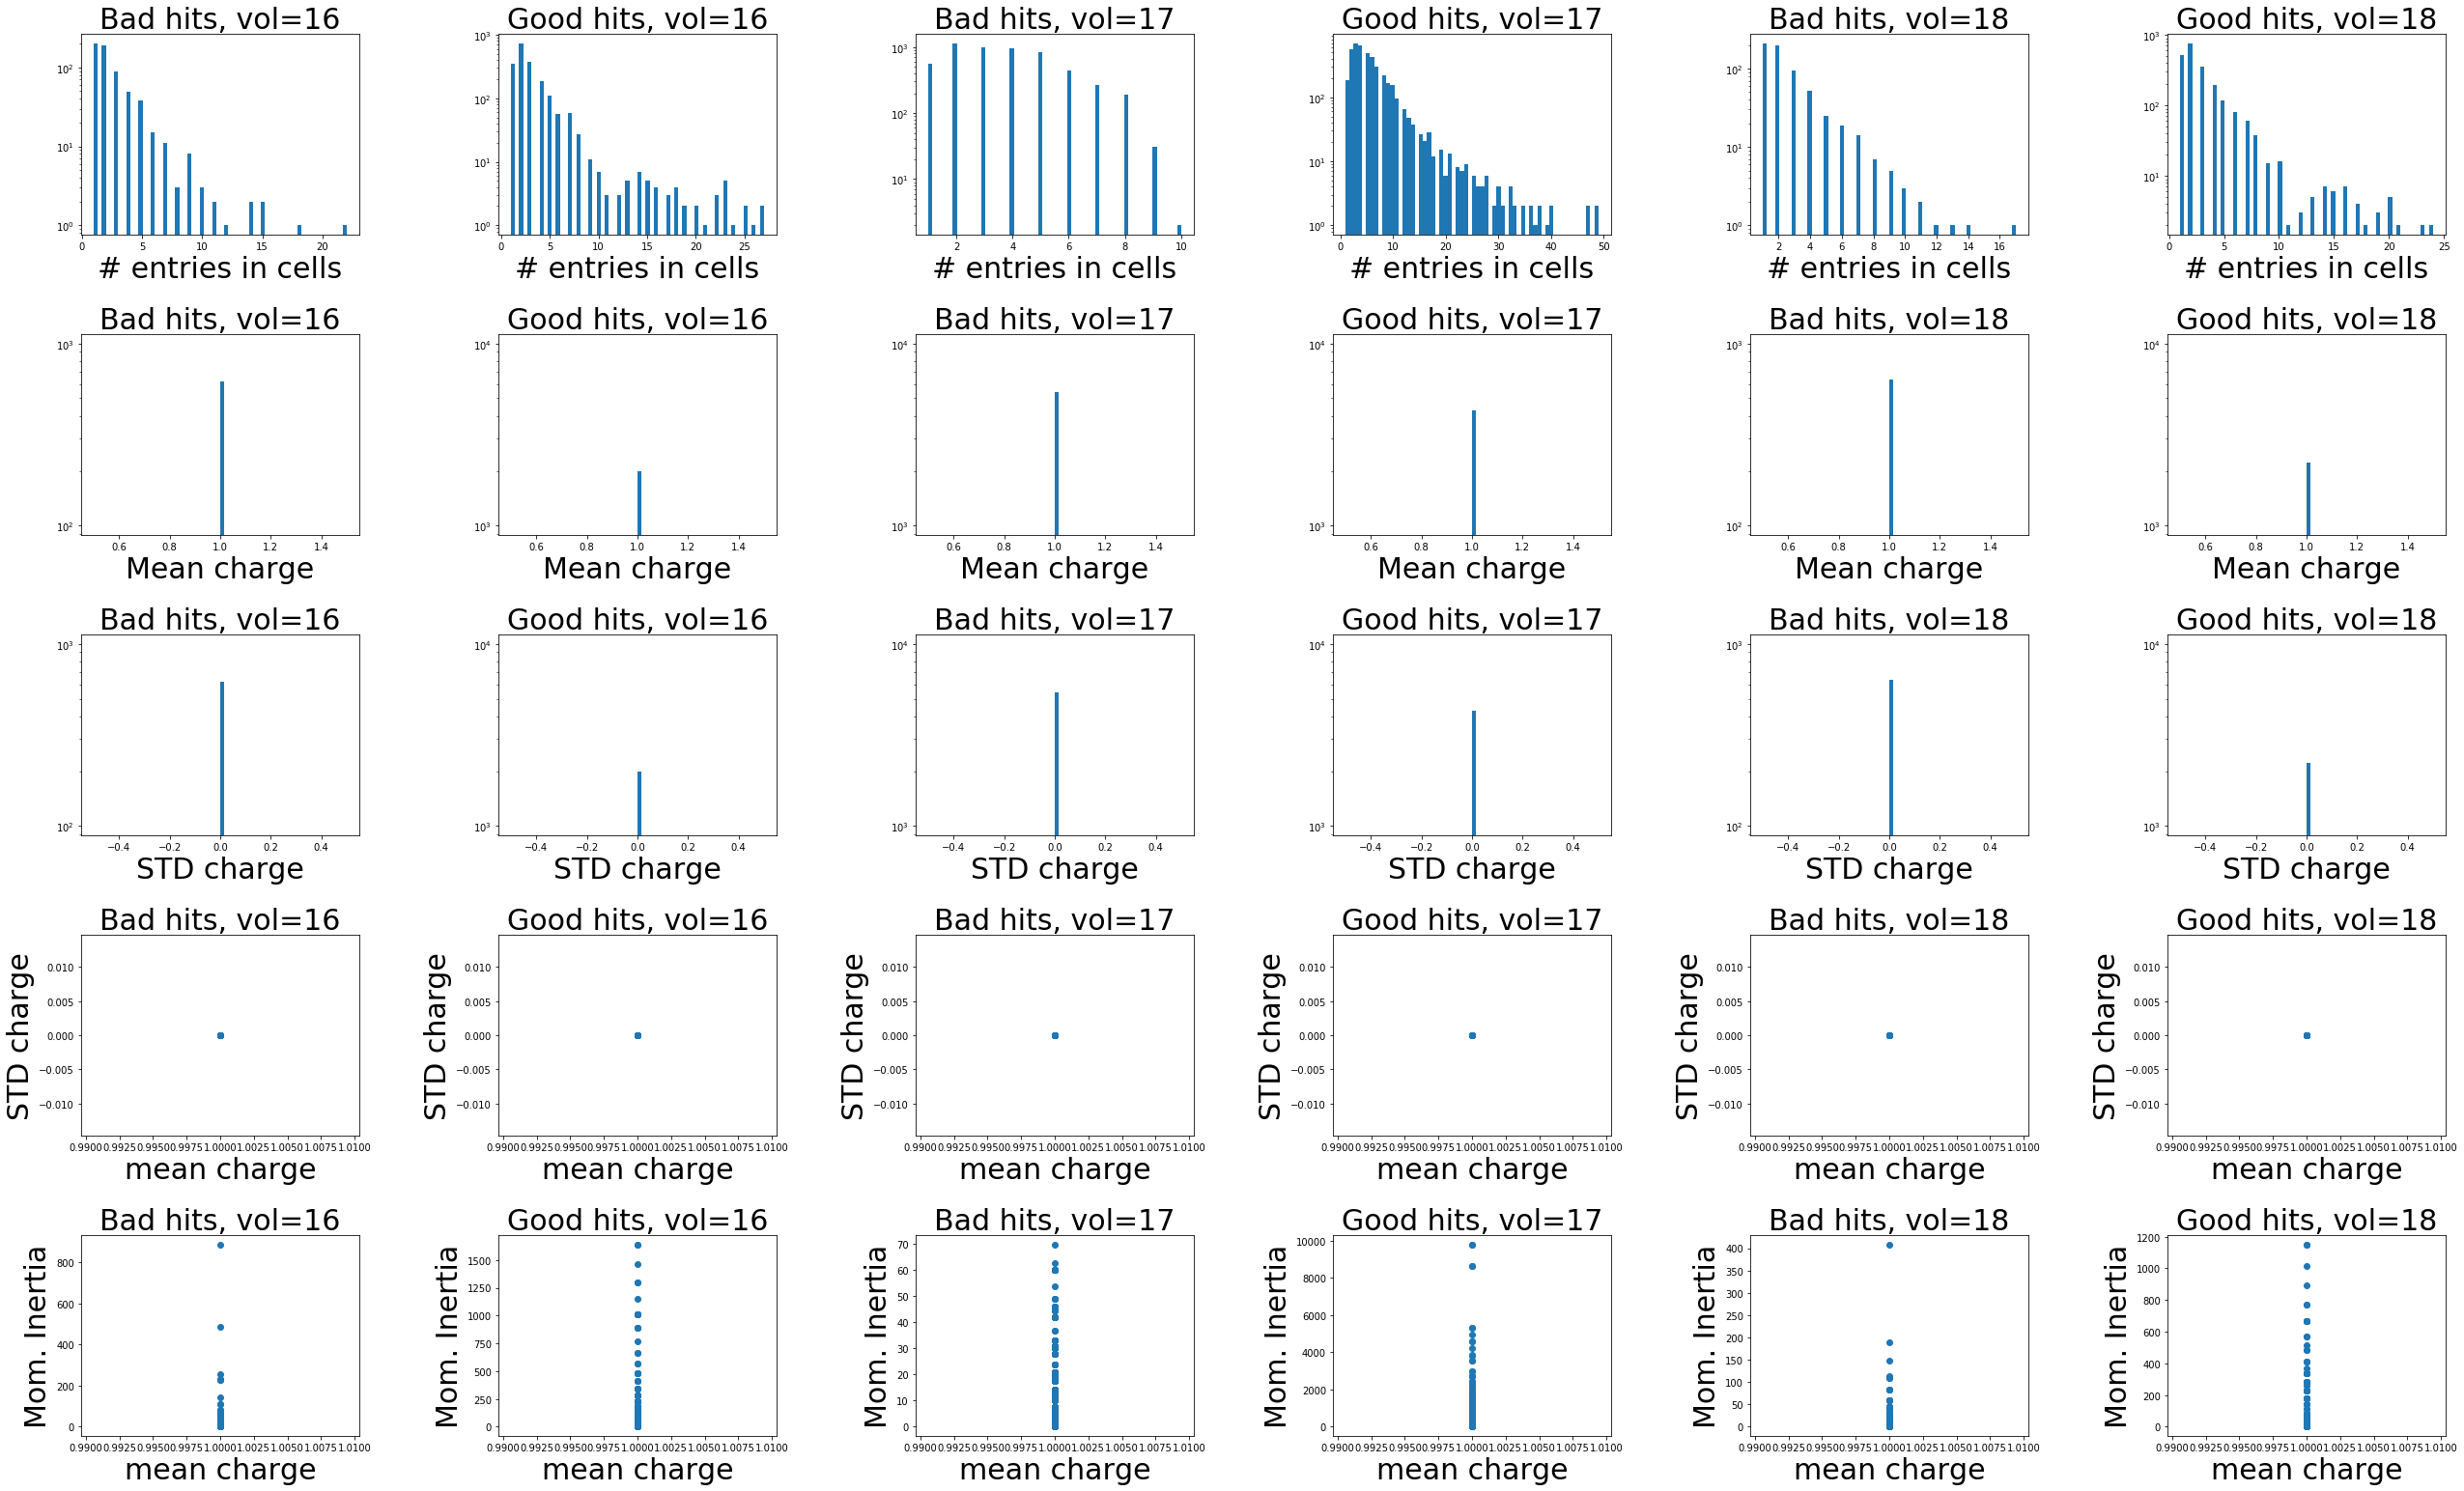

In [54]:
# More plots of good hits and bad hits, now separated by volume element
nplotsrow,nplotscol=5,6

vollist=[7,8,9]
vollist=[12,13,14]
vollist=[16,17,18]
font_size=30

plt.figure(1,figsize=(40,24))
counter = 0
for thingtoplot, labelforplot in zip(['num_cells','mean_cells','std_cells'],['# entries in cells','Mean charge','STD charge']):
    for volumeid in vollist:
        counter+=1
        plt.subplot(nplotsrow,nplotscol, counter)
        plt.title('Bad hits' + ', vol=' + str(volumeid),fontsize=font_size)
        plt.xlabel(labelforplot,fontsize=font_size)
        plt.yscale('log')
        plt.hist(badhits.loc[badhits['volume_id'] == volumeid][thingtoplot],bins=maxbad)
        counter+=1
        plt.subplot(nplotsrow,nplotscol, counter)
        plt.title('Good hits' + ', vol=' + str(volumeid),fontsize=font_size)
        plt.xlabel(labelforplot,fontsize=font_size)
        plt.yscale('log')
        plt.hist(goodhits.loc[goodhits['volume_id'] == volumeid][thingtoplot],bins=maxbad)
        

for volumeid in vollist:
    counter+=1
    plt.subplot(nplotsrow,nplotscol, counter)
    plt.title('Bad hits' + ', vol=' + str(volumeid),fontsize=font_size)
    plt.xlabel('mean charge',fontsize=font_size)
    plt.ylabel('STD charge',fontsize=font_size)
    plt.scatter(np.array(badhits.loc[badhits['volume_id'] == volumeid]['mean_cells']),np.array(badhits.loc[badhits['volume_id'] == volumeid]['std_cells']))
    counter+=1
    plt.subplot(nplotsrow,nplotscol, counter)
    plt.title('Good hits' + ', vol=' + str(volumeid),fontsize=font_size)
    plt.xlabel('mean charge',fontsize=font_size)
    plt.ylabel('STD charge',fontsize=font_size)
    plt.scatter(np.array(goodhits.loc[goodhits['volume_id'] == volumeid]['mean_cells']),np.array(goodhits.loc[goodhits['volume_id'] == volumeid]['std_cells']))
    
for volumeid in vollist:
    counter+=1
    plt.subplot(nplotsrow,nplotscol, counter)
    plt.title('Bad hits' + ', vol=' + str(volumeid),fontsize=font_size)
    plt.xlabel('mean charge',fontsize=font_size)
    plt.ylabel('Mom. Inertia',fontsize=font_size)
    plt.scatter(np.array(badhits.loc[badhits['volume_id']  == volumeid]['mean_cells']),np.array(badhits.loc[badhits['volume_id'] == volumeid]['mominertia']))
    counter+=1
    plt.subplot(nplotsrow,nplotscol, counter)
    plt.title('Good hits' + ', vol=' + str(volumeid),fontsize=font_size)
    plt.xlabel('mean charge',fontsize=font_size)
    plt.ylabel('Mom. Inertia',fontsize=font_size)
    plt.scatter(np.array(goodhits.loc[goodhits['volume_id'] == volumeid]['mean_cells']),np.array(goodhits.loc[goodhits['volume_id'] == volumeid]['mominertia']))




plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.5)
plt.show()

todo: 
Separate good and bad hits by detector volume, and look at distributions.  
Can a discriminator tell good and bad apart using volume_id and cells info?  Either raw or processed?
Can we get directional info from the good detector volumes

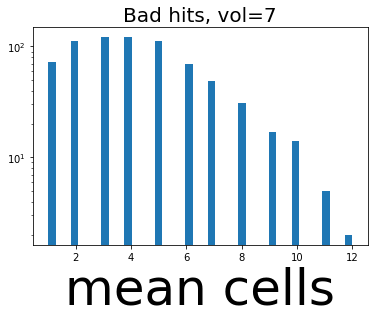

In [47]:

plt.title('Bad hits' + ', vol=' + str(7),fontsize=20)
plt.xlabel('mean cells',fontsize=50)
plt.yscale('log')
plt.hist(badhits.loc[badhits['volume_id'] == 7]['num_cells'],bins=40)
plt.show()

In [112]:
# look at good hits to see how low they go in p
df['p'] = np.sqrt(df['tpx'] * df['tpx'] + df['tpy'] * df['tpy'] + df['tpz'] * df['tpz'])
plt.title('Good hits')
plt.xlabel('p')
plt.yscale('log')
plt.xscale('log')
plt.hist(goodhits['p'],bins = np.logspace(-3,4,50))
plt.show()

In [58]:
xtemp=df.loc[df['volume_id']==7]['ch0']
ytemp=df.loc[df['volume_id']==7]['ch1']

KeyError: 'ch0'

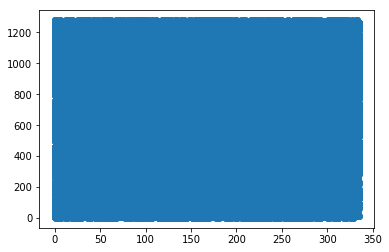

In [68]:
cellstemp =cells.merge(df)
volid = 8
x=np.array(cellstemp.loc[cellstemp['volume_id'] == volid]['ch0'])
y=np.array(cellstemp.loc[cellstemp['volume_id'] == volid]['ch1'])
plt.scatter(x,y)
plt.show()

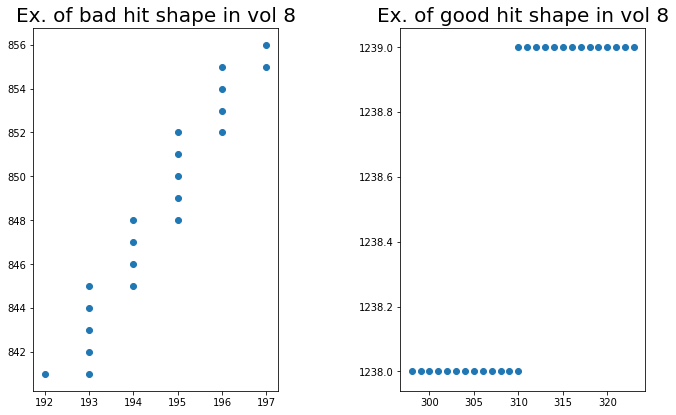

In [99]:
cellstemp =cells.merge(df)
volid = 8

badhitid =np.array(cellstemp[(cellstemp['volume_id'] == volid) & (cellstemp['particle_id'] == 0)]['hit_id'])[0]
goodhitid=np.array(cellstemp[(cellstemp['volume_id'] == volid) & (cellstemp['particle_id'] != 0)]['hit_id'])[10]

plt.figure(1,figsize=(10,6))
plt.subplot(121)
x=np.array(cellstemp[(cellstemp['volume_id'] == volid) & (cellstemp['hit_id'] == badhitid)]['ch0'])
y=np.array(cellstemp[(cellstemp['volume_id'] == volid) & (cellstemp['hit_id'] == badhitid)]['ch1'])
plt.title('Ex. of bad hit shape in ' + 'vol ' + str(volid),fontsize=20)
plt.scatter(x,y)

plt.subplot(122)
x=np.array(cellstemp[(cellstemp['volume_id'] == volid) & (cellstemp['hit_id'] == goodhitid)]['ch0'])
y=np.array(cellstemp[(cellstemp['volume_id'] == volid) & (cellstemp['hit_id'] == goodhitid)]['ch1'])
plt.title('Ex. of good hit shape in ' + 'vol ' + str(volid),fontsize=20)
plt.scatter(x,y)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.5)
plt.show()

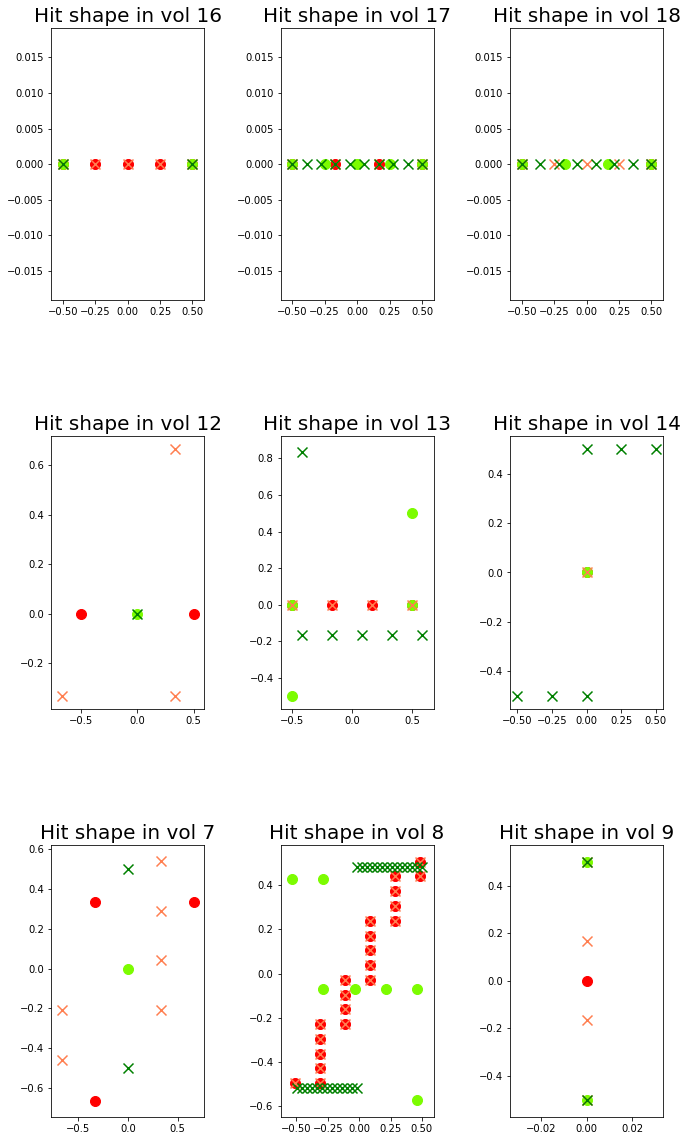

In [136]:
cellstemp =cells.merge(df)
volidlist = [16,17,18,12,13,14,7,8,9]
colbad=['red','coral','orange']
colgood=['lawngreen','green','turquoise']
markers=['o','x','v']
counter = 0
plt.figure(1,figsize=(10,18))
for volid in volidlist:
    counter += 1
    for rnd in range(2):
        badhitid =np.array(cellstemp[(cellstemp['volume_id'] == volid) & (cellstemp['particle_id'] == 0)]['hit_id'])[3*rnd]
        goodhitid=np.array(cellstemp[(cellstemp['volume_id'] == volid) & (cellstemp['particle_id'] != 0)]['hit_id'])[7*rnd]
        plt.subplot(3,3,counter)
        x=np.array(cellstemp[(cellstemp['volume_id'] == volid) & (cellstemp['hit_id'] == badhitid)]['ch0'])
        y=np.array(cellstemp[(cellstemp['volume_id'] == volid) & (cellstemp['hit_id'] == badhitid)]['ch1'])
        xrescale = (x - np.mean(x))/max([1,max(x)-min(x)])
        yrescale = (y - np.mean(y))/max([1,max(y)-min(y)])
        plt.title('Hit shape in ' + 'vol ' + str(volid),fontsize=20)
        plt.scatter(xrescale,yrescale,color = colbad[rnd],marker = markers[rnd],s=100)
        x=np.array(cellstemp[(cellstemp['volume_id'] == volid) & (cellstemp['hit_id'] == goodhitid)]['ch0'])
        y=np.array(cellstemp[(cellstemp['volume_id'] == volid) & (cellstemp['hit_id'] == goodhitid)]['ch1'])
        xrescale = (x - np.mean(x))/max([1,max(x)-min(x)])
        yrescale = (y - np.mean(y))/max([1,max(y)-min(y)])
        plt.scatter(xrescale,yrescale,color = colgood[rnd],marker = markers[rnd],s=100)
    
    
    
    
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.5)
plt.show()

vol, tantheta  16 0.012277374481718279
vol, tantheta  17 0.02255989253969222
vol, tantheta  18 0.014176604937683177
vol, tantheta  12 0.18642813484177587
vol, tantheta  13 0.14719746042396978
vol, tantheta  14 0.18331604108428992
vol, tantheta  7 3.8590142430082524
vol, tantheta  8 3.7113369827268716
vol, tantheta  9 3.8533324492952032


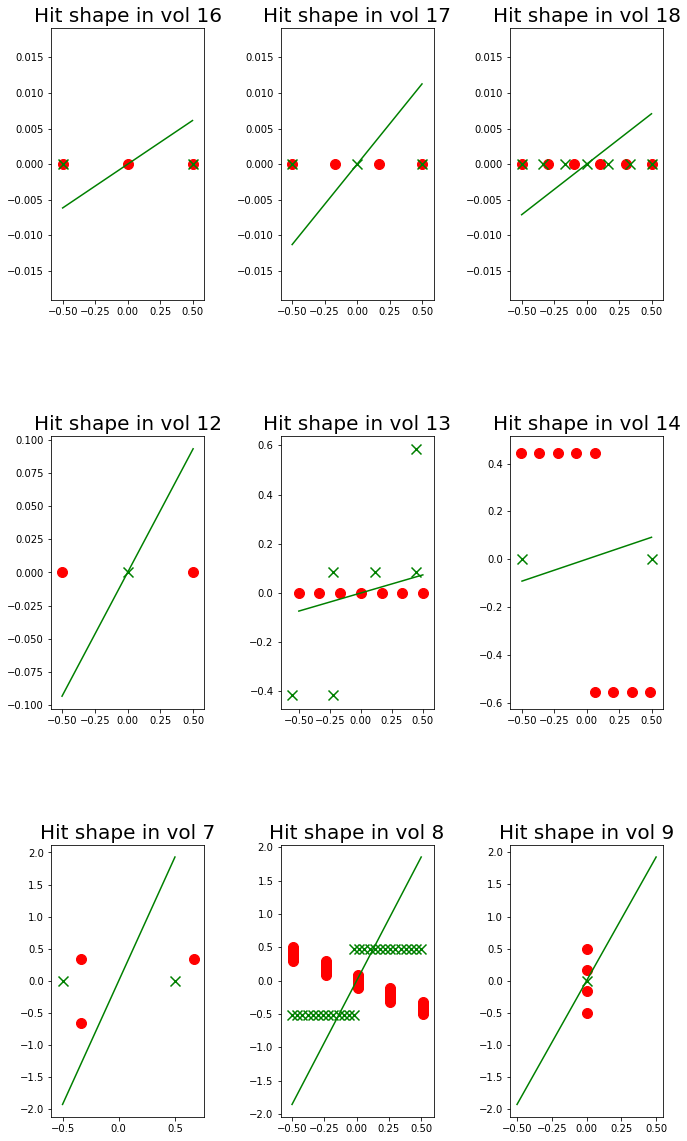

In [376]:
cellstemp = cells.merge(df)
volidlist = [16,17,18,12,13,14,7,8,9]
colbad=['red','coral','orange']
colgood=['lawngreen','green','turquoise']
markers=['o','x','v']
counter = 0
plt.figure(1,figsize=(10,18))
for volid in volidlist:
    counter += 1
    badhitid =np.array(cellstemp[(cellstemp['volume_id'] == volid) & (cellstemp['particle_id'] == 0)]['hit_id'])[60]
    goodhitid=np.array(cellstemp[(cellstemp['volume_id'] == volid) & (cellstemp['particle_id'] != 0)]['hit_id'])[17]
    
    plt.subplot(3,3,counter)
    x=np.array(cellstemp[(cellstemp['volume_id'] == volid) & (cellstemp['hit_id'] == badhitid)]['ch0'])
    y=np.array(cellstemp[(cellstemp['volume_id'] == volid) & (cellstemp['hit_id'] == badhitid)]['ch1'])
    layerid = np.array(cellstemp[(cellstemp['volume_id'] == volid) & (cellstemp['hit_id'] == badhitid)]['layer_id'])[0]
    modid = np.array(cellstemp[(cellstemp['volume_id'] == volid) & (cellstemp['hit_id'] == badhitid)]['module_id'])[0]
    xrescale = (x - np.mean(x))/max([1,max(x)-min(x)])
    yrescale = (y - np.mean(y))/max([1,max(y)-min(y)])
#     tpx=np.array(truth[truth['hit_id']==badhitid]['tpx'])[0]
#     tpy=np.array(truth[truth['hit_id']==badhitid]['tpy'])[0]
#     tpz=np.array(truth[truth['hit_id']==badhitid]['tpz'])[0]
    
#     ch0,ch1 = truthmom_to_ch(tpx, tpy, tpz, volid, layerid, modid)
# #    print 'bad ', ch0, ch1
#     tantheta = ch1/ch0
    
    plt.title('Hit shape in ' + 'vol ' + str(volid),fontsize=20)
    plt.scatter(xrescale,yrescale,color = colbad[0],marker = markers[0],s=100)
#    plt.plot([-0.5,0.5],[-0.5 * tantheta,0.5*tantheta],color = colbad[0])
    x=np.array(cellstemp[(cellstemp['volume_id'] == volid) & (cellstemp['hit_id'] == goodhitid)]['ch0'])
    y=np.array(cellstemp[(cellstemp['volume_id'] == volid) & (cellstemp['hit_id'] == goodhitid)]['ch1'])
    layerid = np.array(cellstemp[(cellstemp['volume_id'] == volid) & (cellstemp['hit_id'] == goodhitid)]['layer_id'])[0]
    modid = np.array(cellstemp[(cellstemp['volume_id'] == volid) & (cellstemp['hit_id'] == goodhitid)]['module_id'])[0]
    xrescale = (x - np.mean(x))/max([1,max(x)-min(x)])
    yrescale = (y - np.mean(y))/max([1,max(y)-min(y)])
    tpx=np.array(truth[truth['hit_id']==goodhitid]['tpx'])[0]
    tpy=np.array(truth[truth['hit_id']==goodhitid]['tpy'])[0]
    tpz=np.array(truth[truth['hit_id']==goodhitid]['tpz'])[0]
    ch0,ch1 = truthmom_to_ch(tpx, tpy, tpz, volid, layerid, modid)
#    print 'good ', ch0, ch1
    tantheta = ch1/ch0
    print "vol, tantheta ", volid, tantheta 
    plt.plot([-0.5,0.5],[-0.5 * tantheta,0.5*tantheta],color = colgood[1])
    plt.scatter(xrescale,yrescale,color = colgood[1],marker = markers[1],s=100)
    
    
    
    
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.5)
plt.show()

In [153]:
tpx=np.array(truth[truth['hit_id']==badhitid]['tpx'])[0]
tpy=np.array(truth[truth['hit_id']==badhitid]['tpy'])[0]
tantheta = tpy/tpx

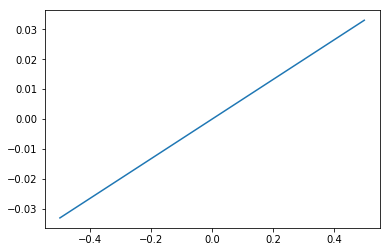

In [156]:
plt.plot([-0.5,0.5],[-0.5 * tantheta,0.5*tantheta])
plt.show()

In [148]:
tpx, tpy

(-531735.0, -35091.1)